In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [46]:
df_all_bots = pd.read_csv('Logs/log_all_bots_same_skills.csv')

# Calculate win and draw rates for combined dataset
The combined dataset includes all games, where a Bot plays against a copy of itself

In [47]:
# Extract wins and draws for combined dataset
total_games_all_bots = df_all_bots.shape[0]
wins_start_player_all_bots = df_all_bots[df_all_bots['starting player'] == df_all_bots['winning number']].shape[0]
wins_second_player_all_bots = df_all_bots[df_all_bots['starting player'] != df_all_bots['winning number']].shape[0] - df_all_bots[df_all_bots['winning number'] == 0].shape[0]
draws_all_bots = df_all_bots[df_all_bots['winning number'] == 0].shape[0]

# Calculate win rate for start/second player and draw rate 
win_rate_start_player_all_bots = wins_start_player_all_bots / total_games_all_bots
win_rate_second_player_all_bots = wins_second_player_all_bots / total_games_all_bots
draw_rate_all_bots = draws_all_bots / total_games_all_bots

print(win_rate_start_player_all_bots, win_rate_second_player_all_bots, draw_rate_all_bots)


0.256775 0.202275 0.54095


In [96]:
file_paths = {
    'Bot0': 'Logs/log_Bot0_Bot0.csv',
    'Bot1': 'Logs/log_Bot1_Bot1.csv',
    'Bot2': 'Logs/log_Bot2_Bot2.csv',
    'Bot3': 'Logs/log_Bot3_Bot3.csv',
}

results = {}

for bot_name, path in file_paths.items():
    data = pd.read_csv(path)
    total_games = data.shape[0]
    wins_start_player = data[data['starting player'] == data['winning number']].shape[0]
    wins_second_player = data[data['starting player'] != data['winning number']].shape[0] - data[data['winning number'] == 0].shape[0]
    draws = data[data['winning number'] == 0].shape[0]
    
    win_rate_start_player = wins_start_player / total_games
    win_rate_second_player = wins_second_player / total_games
    draw_rate = draws / total_games
    
    results[bot_name] = {
        'win_rate_start_player': win_rate_start_player,
        'win_rate_second_player': win_rate_second_player,
        'draw_rate': draw_rate
    }

results


{'Bot0': {'win_rate_start_player': 0.5233,
  'win_rate_second_player': 0.4074,
  'draw_rate': 0.0693},
 'Bot1': {'win_rate_start_player': 0.1416,
  'win_rate_second_player': 0.1028,
  'draw_rate': 0.7556},
 'Bot2': {'win_rate_start_player': 0.0816,
  'win_rate_second_player': 0.0348,
  'draw_rate': 0.8836},
 'Bot3': {'win_rate_start_player': 0.2806,
  'win_rate_second_player': 0.2641,
  'draw_rate': 0.4553}}

# Plots mit Seaborn zur schöneren Darstellung

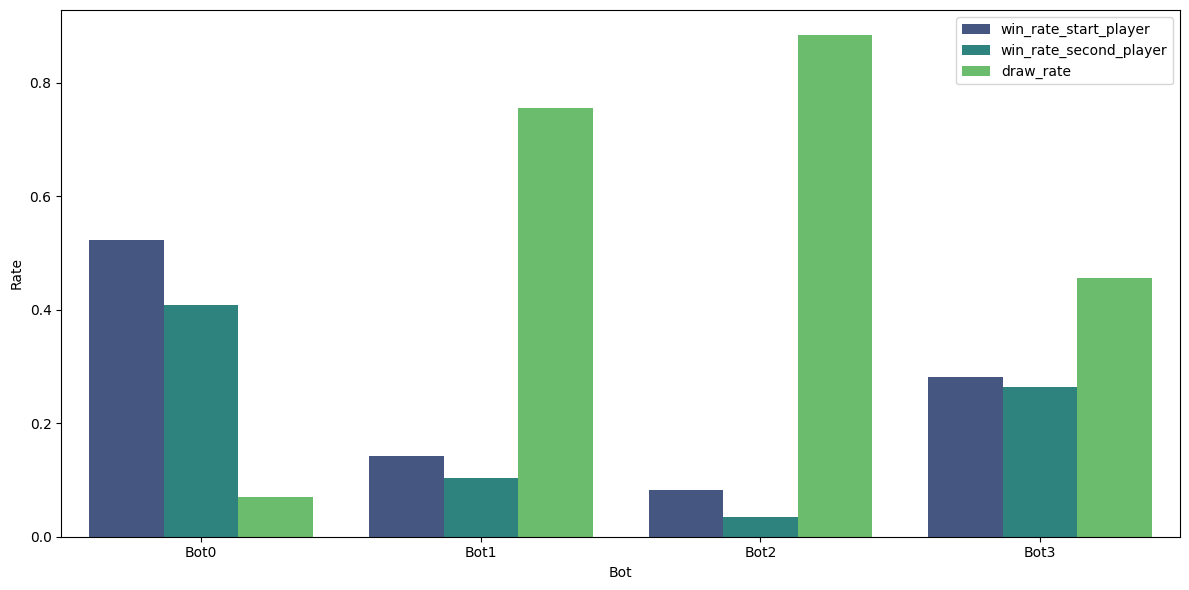

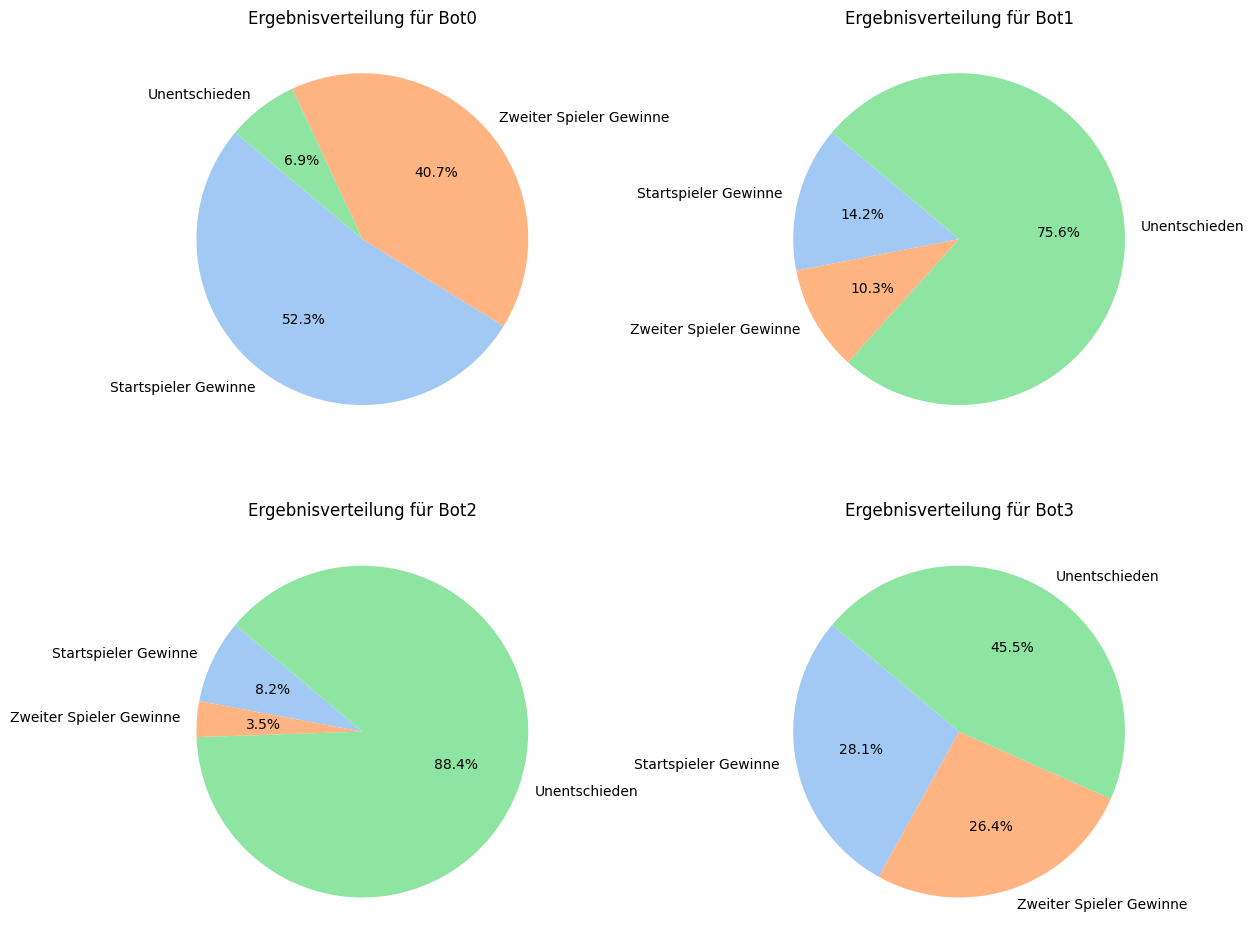

In [113]:
# convert dict to dataframe for seaborn
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index': 'Bot'})
# depivot data
results_df_melted = results_df.melt(id_vars=["Bot"], var_name="Ergebnis", value_name="Rate")
bots = list(results.keys())

# Bar charts
plt.figure(figsize=(12, 6))
sns.barplot(x='Bot', y='Rate', hue='Ergebnis', data=results_df_melted, palette='viridis')
#plt.title('Gewinn- und Unentschiedenraten für alle Bots')
plt.ylabel('Rate')
plt.xlabel('Bot')
plt.legend()
plt.tight_layout()
plt.show()

# Pie Charts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, bot_name in enumerate(bots):
    sizes = [results[bot_name]['win_rate_start_player'], results[bot_name]['win_rate_second_player'], results[bot_name]['draw_rate']]
    labels = ['Startspieler Gewinne', 'Zweiter Spieler Gewinne', 'Unentschieden']
    colors = sns.color_palette('pastel')[0:3]
    axes[i//2, i%2].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[i//2, i%2].set_title(f'Ergebnisverteilung für {bot_name}')

plt.tight_layout()
plt.show()


In [112]:
# Re-defining the file paths with the correct paths obtained from the uploads
file_paths_bot_pairs = {
    'Bot0_Bot0': 'Logs/log_Bot0_Bot0.csv',
    'Bot0_Bot1': 'Logs/log_Bot0_Bot1.csv',
    'Bot0_Bot2': 'Logs/log_Bot0_Bot2.csv',
    'Bot0_Bot3': 'Logs/log_Bot0_Bot3.csv',
    'Bot1_Bot1': 'Logs/log_Bot1_Bot1.csv',
    'Bot1_Bot2': 'Logs/log_Bot1_Bot2.csv',
    'Bot1_Bot3': 'Logs/log_Bot1_Bot3.csv',
    'Bot2_Bot2': 'Logs/log_Bot2_Bot2.csv',
    'Bot2_Bot3': 'Logs/log_Bot2_Bot3.csv',
    'Bot3_Bot3': 'Logs/log_Bot3_Bot3.csv'
}

# Re-executing the analysis with the updated paths
pairwise_results = {}

for pair_name, path in file_paths_bot_pairs.items():
    data = pd.read_csv(path)
    total_games = data.shape[0]
    # Adjusting the logic to correctly calculate wins for each bot
    wins_bot1 = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
    wins_bot2 = data[data['starting player'] == 2][data['winning number'] == 2].shape[0] + data[data['starting player'] == 1][data['winning number'] == 2].shape[0]
    
    #wins_bot2 = total_games - wins_bot1 - data[data['winning number'] == 0].shape[0]
    draws = data[data['winning number'] == 0].shape[0]
    
    win_rate_bot1 = wins_bot1 / total_games
    win_rate_bot2 = wins_bot2 / total_games
    draw_rate = draws / total_games
    
    pairwise_results[pair_name] = {
        'total_games': total_games,
        'win_rate_bot1': win_rate_bot1,
        'win_rate_bot2': win_rate_bot2,
        'draw_rate': draw_rate
    }

print(pairwise_results)
# Preparing to convert results data to a matrix form for better visualization


# Initialize an empty DataFrame for the win matrix
win_matrix = pd.DataFrame(np.nan, index=["Bot0", "Bot1", "Bot2", "Bot3"], columns=["Bot0", "Bot1", "Bot2", "Bot3"])

# Fill the win matrix with win rates
for pair, result in pairwise_results.items():
    bot1, bot2 = pair.split('_')
    # For bot vs. itself, win_rate_bot1 is the win rate when it starts
    if bot1 == bot2:
        win_matrix.at[bot1, bot2] = result['win_rate_bot1']
    else:
        # For different bots, bot1's win rate against bot2 and vice versa
        win_matrix.at[bot1, bot2] = result['win_rate_bot1']
        win_matrix.at[bot2, bot1] = result['win_rate_bot2']

win_matrix


{'Bot0_Bot0': {'total_games': 10000, 'win_rate_bot1': 0.4685, 'win_rate_bot2': 0.4622, 'draw_rate': 0.0693}, 'Bot0_Bot1': {'total_games': 10000, 'win_rate_bot1': 0.0961, 'win_rate_bot2': 0.6705, 'draw_rate': 0.2334}, 'Bot0_Bot2': {'total_games': 10000, 'win_rate_bot1': 0.0181, 'win_rate_bot2': 0.9081, 'draw_rate': 0.0738}, 'Bot0_Bot3': {'total_games': 10000, 'win_rate_bot1': 0.0002, 'win_rate_bot2': 0.9996, 'draw_rate': 0.0002}, 'Bot1_Bot1': {'total_games': 10000, 'win_rate_bot1': 0.1158, 'win_rate_bot2': 0.1286, 'draw_rate': 0.7556}, 'Bot1_Bot2': {'total_games': 10000, 'win_rate_bot1': 0.0353, 'win_rate_bot2': 0.2778, 'draw_rate': 0.6869}, 'Bot1_Bot3': {'total_games': 10000, 'win_rate_bot1': 0.0154, 'win_rate_bot2': 0.8481, 'draw_rate': 0.1365}, 'Bot2_Bot2': {'total_games': 10000, 'win_rate_bot1': 0.056, 'win_rate_bot2': 0.0604, 'draw_rate': 0.8836}, 'Bot2_Bot3': {'total_games': 10000, 'win_rate_bot1': 0.0336, 'win_rate_bot2': 0.4707, 'draw_rate': 0.4957}, 'Bot3_Bot3': {'total_games':

/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/931862420.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_bot1 = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/931862420.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_bot1 = data[data['starting player'] == 1][data['winning number'] == 1].shape[0] + data[data['starting player'] == 2][data['winning number'] == 1].shape[0]
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc0000gn/T/ipykernel_6878/931862420.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins_bot2 = data[data['starting player'] == 2][data['winning number'] == 2].shape[0] + data[data['starting player'] == 1][data['winning number'] == 2].shape[0]
/var/folders/0f/hnckk90x47ldd_cjc_28ypfc000

,Bot0,Bot1,Bot2,Bot3
Bot0,0.4685,0.0961,0.0181,0.0002
Bot1,0.6705,0.1158,0.0353,0.0154
Bot2,0.9081,0.2778,0.0560,0.0336
Bot3,0.9996,0.8481,0.4707,0.2744


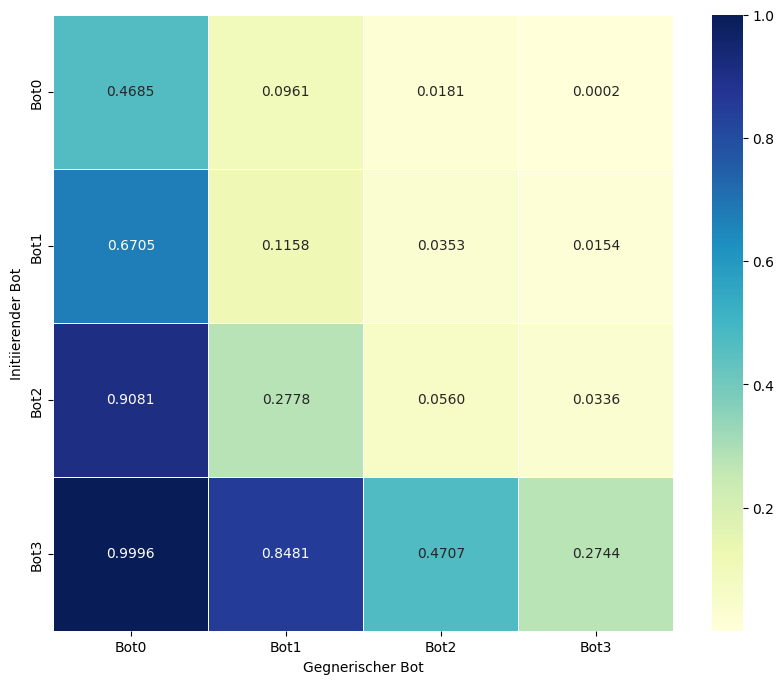

<Figure size 640x480 with 0 Axes>

In [114]:

# visualize matrix in seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(win_matrix, annot=True, cmap="YlGnBu", linewidths=.5, cbar=True, fmt=".4f", vmax=1)
#plt.suptitle('Gewinnraten in Bot vs. Bot Spielen (n = 10.000 je Spielpaarung)')
plt.xlabel('Gegnerischer Bot')
plt.ylabel('Initiierender Bot')
plt.show()
plt.savefig('win_matrix.jpg')